# Find the "best looking" PNL based on general shape
## Goal: produce a metric where the lowest value is the best shape.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# Setting some constraints
STARTING_VALUE = 100
MINIMUM_VALUE = STARTING_VALUE * 0.2

In [3]:
# Create dates for 3 years
dates = pd.date_range(start="2021-01-01", end="2023-12-01", freq="MS")

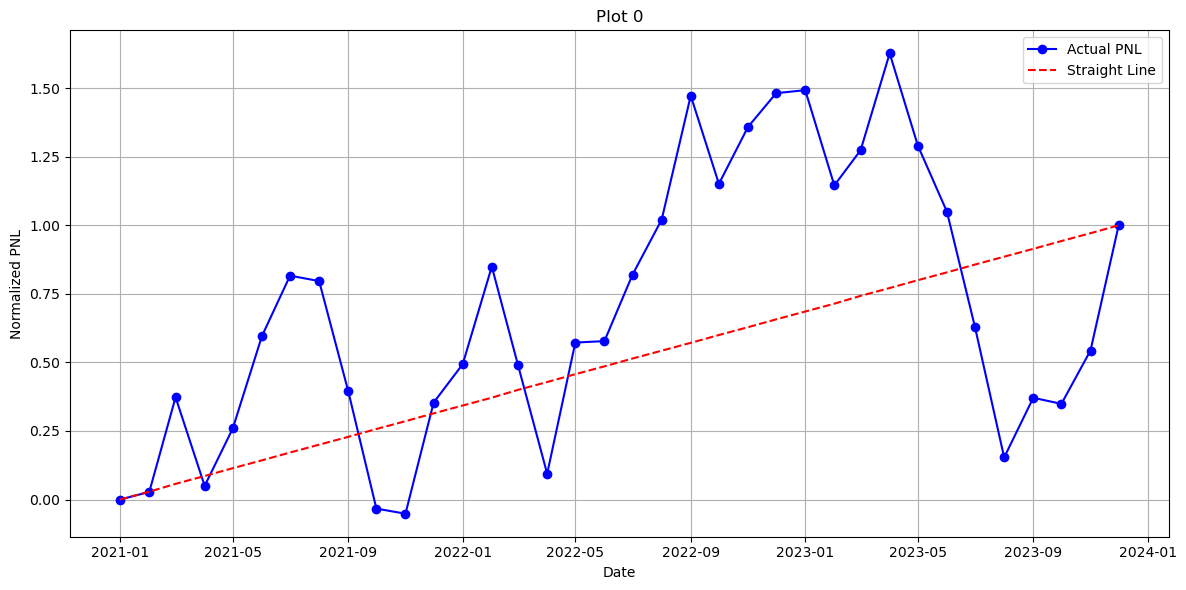

Sum of Squares Difference: 7.936845265494011


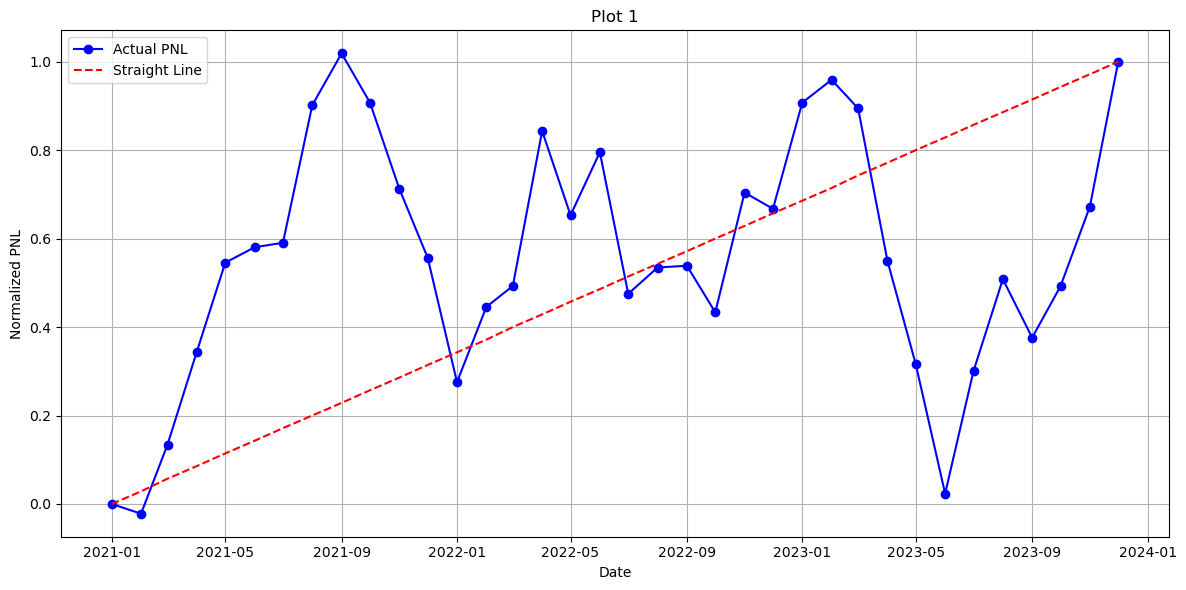

Sum of Squares Difference: 4.868189048982195


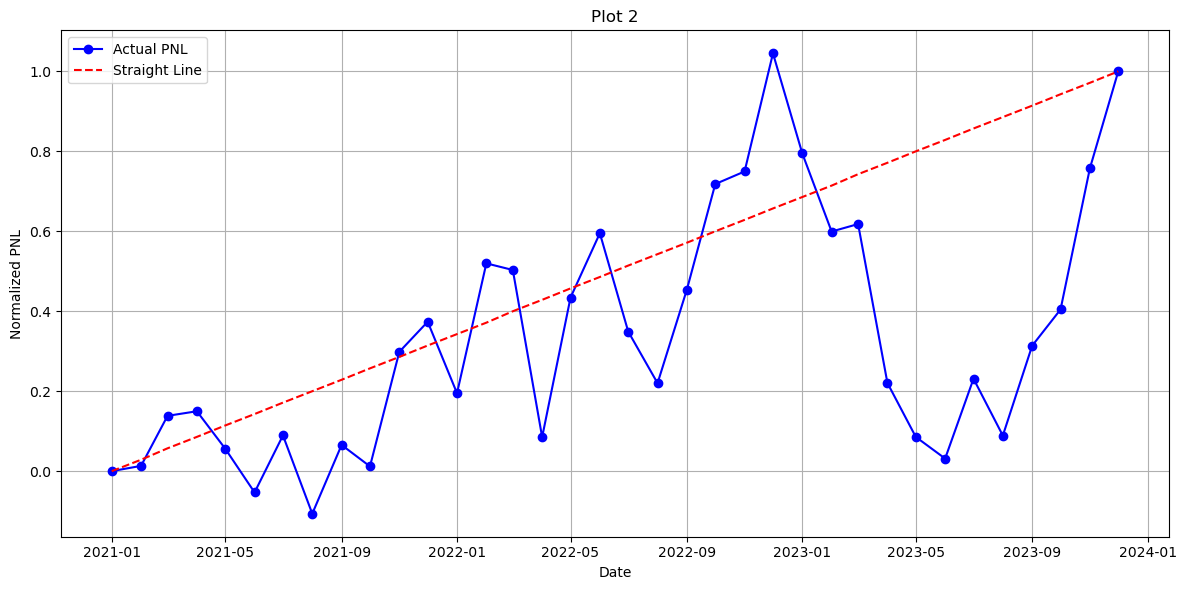

Sum of Squares Difference: 3.966053624830409


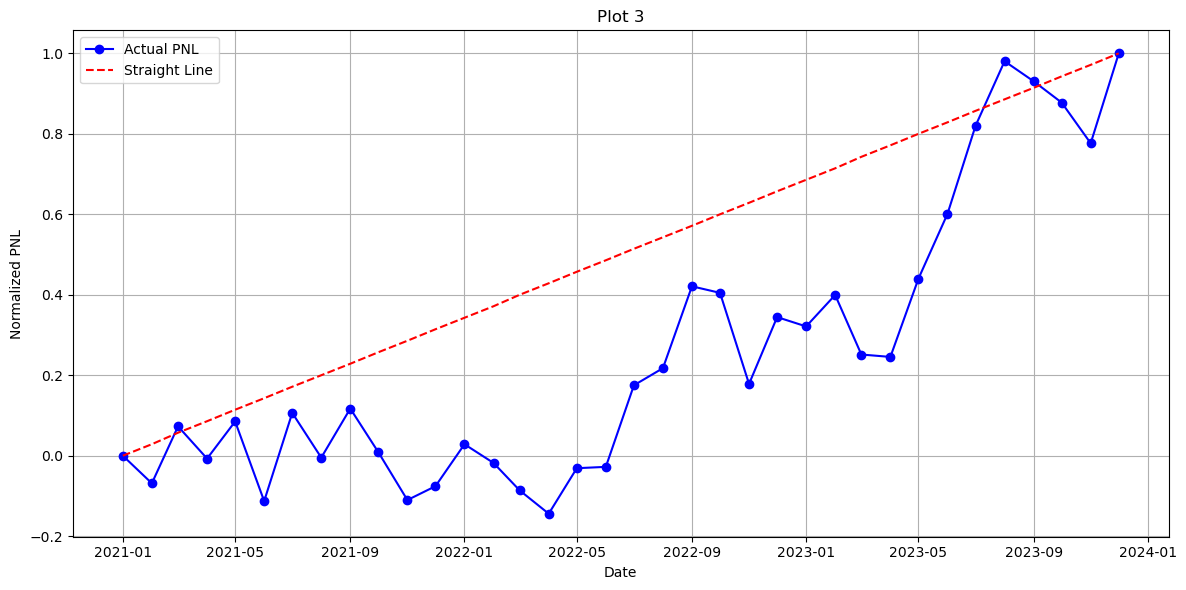

Sum of Squares Difference: 3.397030218776779


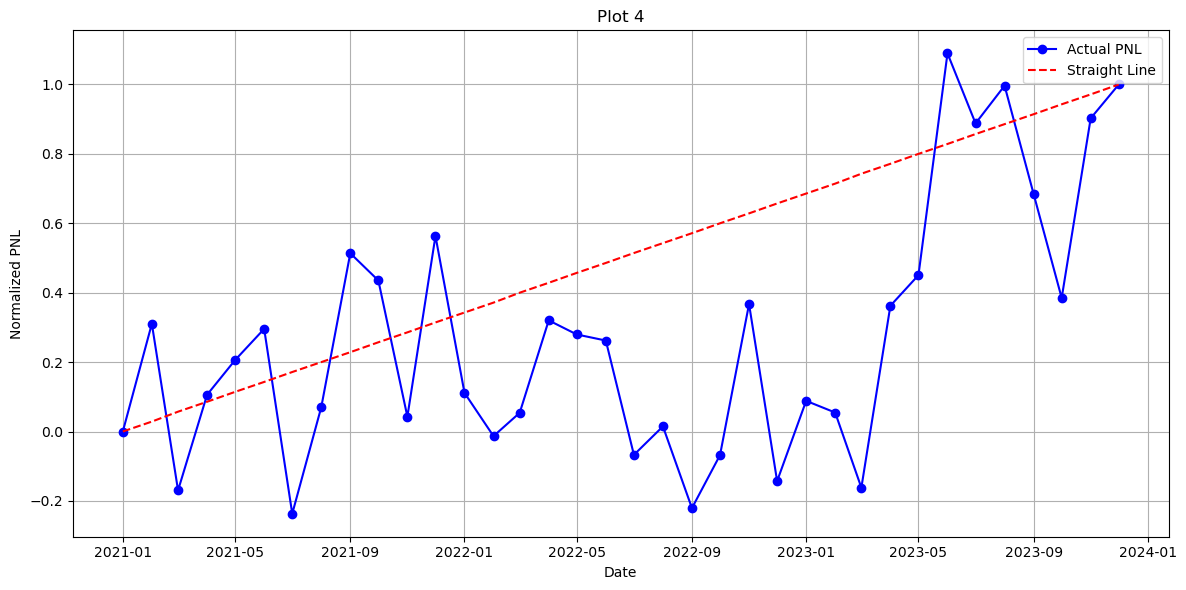

Sum of Squares Difference: 5.7450568154753


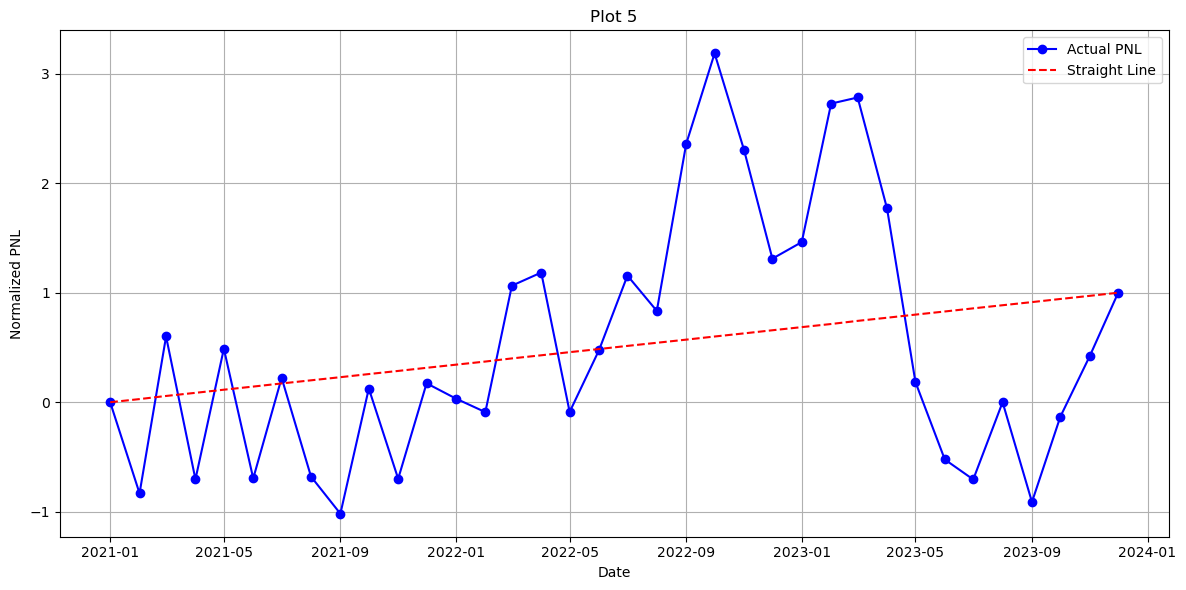

Sum of Squares Difference: 41.11217901352888


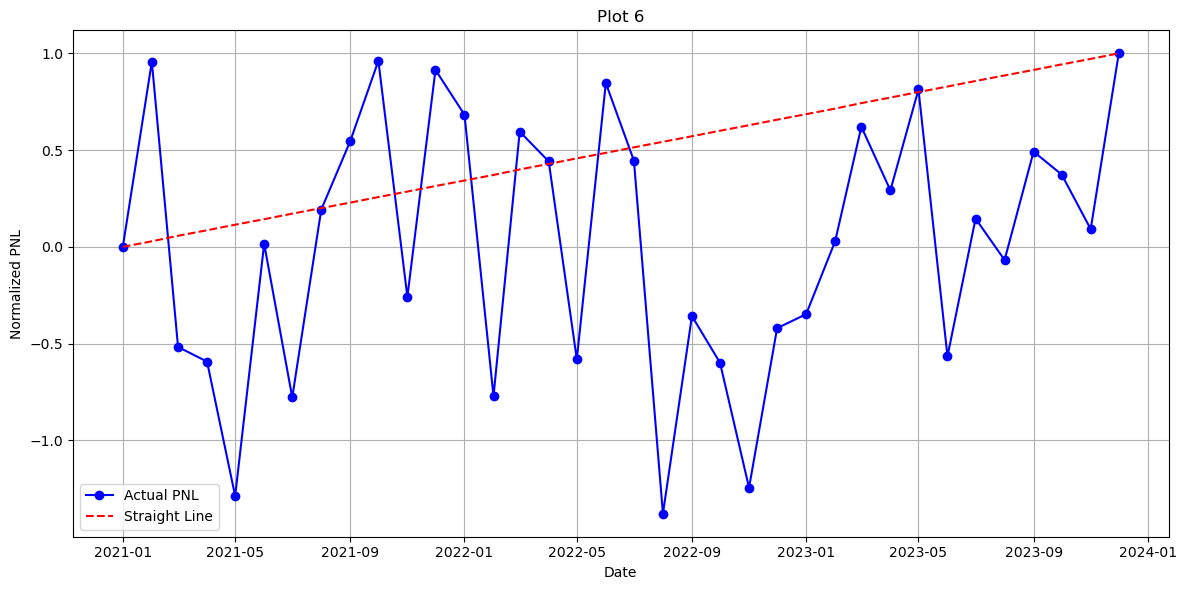

Sum of Squares Difference: 25.557060126356404


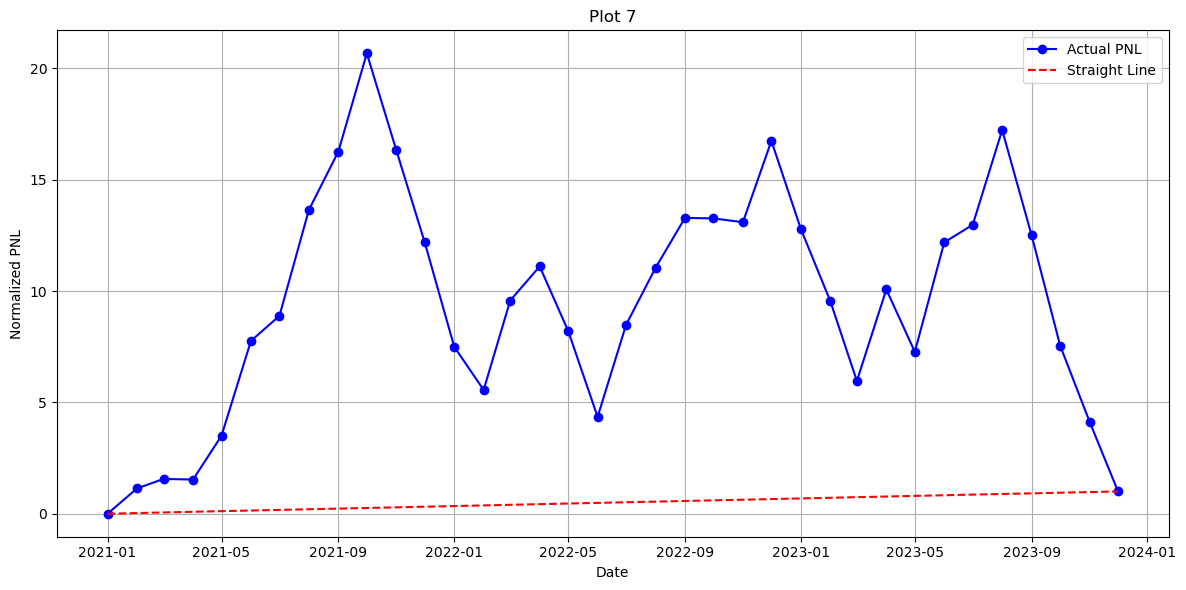

Sum of Squares Difference: 3774.9782049242062


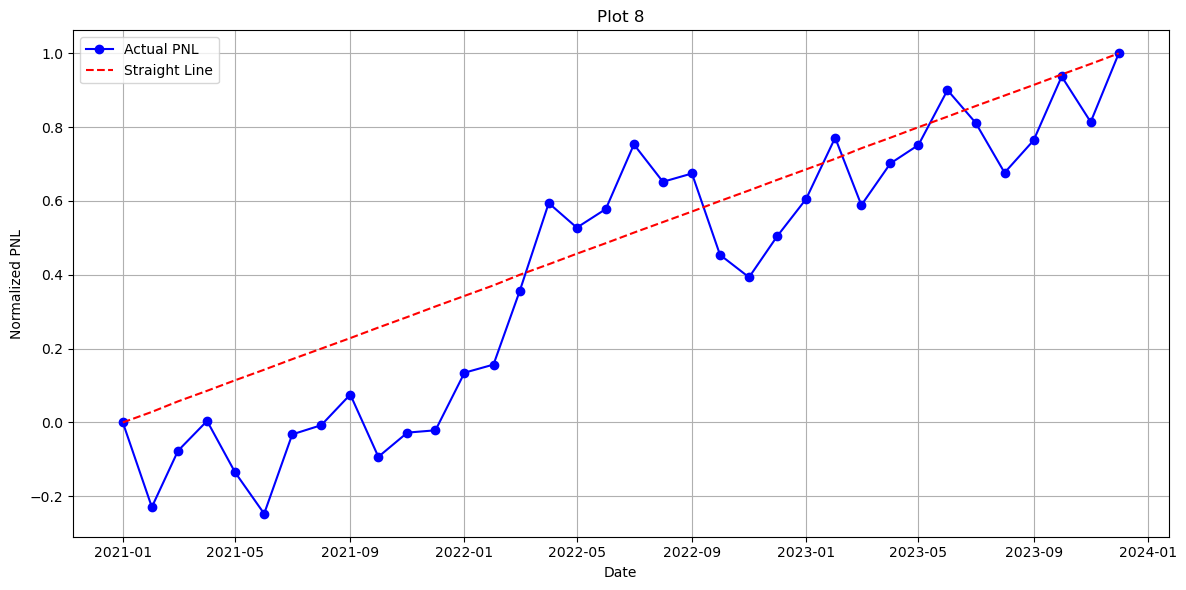

Sum of Squares Difference: 1.197777382181889


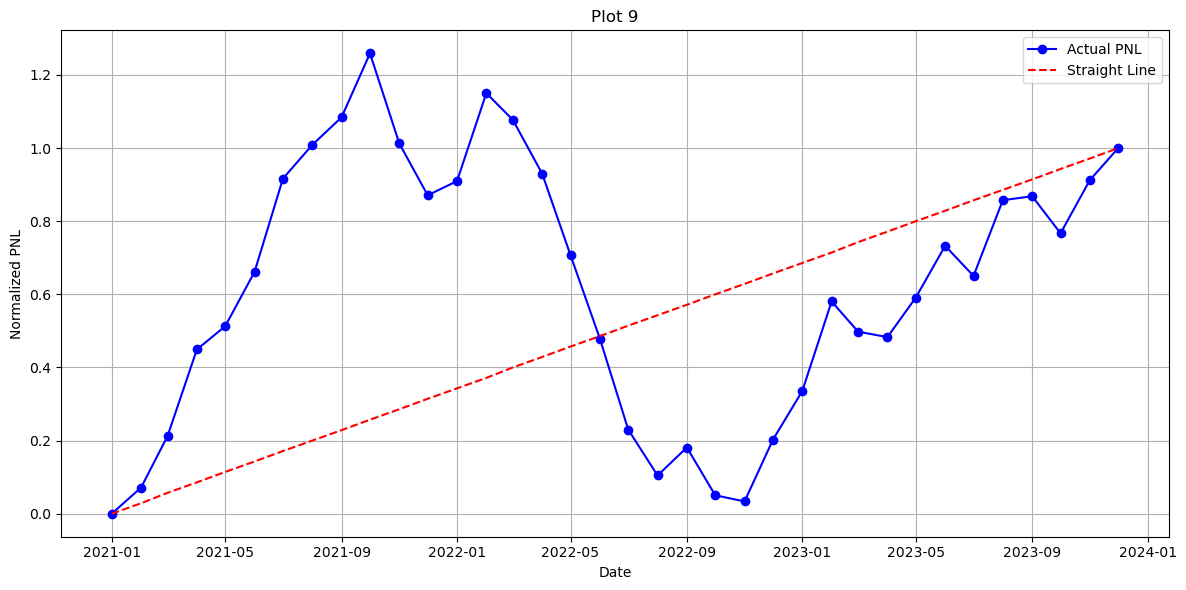

Sum of Squares Difference: 7.775232275113381


In [4]:
pnl_metrics_list = []
for index in range(10):
    # Initialize lists
    cumulative_pnls = []
    
    # Generate PNL values ensuring the constraints
    cumulative = STARTING_VALUE
    for _ in dates:
        pnl = random.randint(-1000, 1000)
        temp_cumulative = cumulative + pnl
        while temp_cumulative < MINIMUM_VALUE:
            pnl = random.randint(-1000, 1000)
            temp_cumulative = cumulative + pnl
        cumulative = temp_cumulative
        cumulative_pnls.append(cumulative)
    
    # Normalize values
    min_value = cumulative_pnls[0]
    max_value = cumulative_pnls[-1]
    normalized_pnls = [(x - min_value) / (max_value - min_value) for x in cumulative_pnls]
    
    # Compute straight line values
    X = np.array(range(len(dates)))
    y1, y2 = normalized_pnls[0], normalized_pnls[-1]
    straight_line_values = y1 + (y2 - y1) / (X[-1] - X[0]) * (X - X[0])
    
    # Calculate residuals and sum of squares
    residuals = np.array(normalized_pnls) - straight_line_values
    sum_of_squares = np.sum(residuals ** 2)
    
    # Create DataFrame
    df = pd.DataFrame({
        'Date': dates,
        'Cumulative PNL ($)': cumulative_pnls,
        'Normalized PNL': normalized_pnls,
        'Straight Line PNL': straight_line_values
    })
    
    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['Normalized PNL'], marker='o', linestyle='-', color='b', label="Actual PNL")
    plt.plot(df['Date'], df['Straight Line PNL'], color='r', linestyle='--', label="Straight Line")
    plt.title(f'Plot {index}')
    plt.xlabel('Date')
    plt.ylabel('Normalized PNL')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    print(f"Sum of Squares Difference: {sum_of_squares}")
    pnl_metrics_list.append(sum_of_squares)    

In [5]:
print(f'The "best looking" PNL is # {pnl_metrics_list.index(min(pnl_metrics_list))}')

The "best looking" PNL is # 8
